# Three-Dimensional Plotting in Matplotlib

Matplotlib was initially designed with only two-dimensional plotting in mind. Three-dimensional plots are enabled by importing the `mplot3d` toolkit, included with the main Matplotlib installation:

In [1]:
from mpl_toolkits import mplot3d

Once this submodule is imported, a three-dimensional axes can be created by passing the keyword `projection='3d'` to any of the normal axes creation routines:

In [2]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

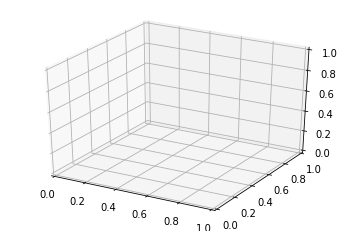

In [3]:
fig = plt.figure()
ax = plt.axes(projection='3d')

With this three-dimensional axes enabled, we can now plot a variety of three-dimensional plot types. Three-dimensional plotting is on of the functionalities that benefits immensely from viewing figures interactively (`%matplotlib notebook`) rather than statically (`%matplotlib inline`).

## Three-dimensional Points and Lines

The most basic three-dimensional plot is a line or collection of scatter plot created from sets of (x, y, z) triples. These can be created using the `ax.plot3D` and `ax.scatter3D` functions. The call signature fore these is nearly identical to that of their two-dimensional counterparts. 

Here we'll plot a trigonometric spiral, along with some points drawn randomly near the line:

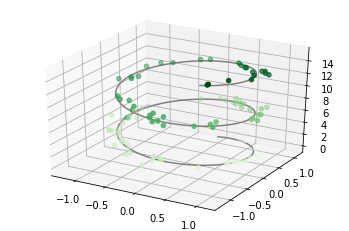

In [4]:
ax = plt.axes(projection='3d')

# Data for a three-dimensional line
zline = np.linspace(0, 15, 1000)
xline = np.sin(zline)
yline = np.cos(zline)
ax.plot3D(xline, yline, zline, 'gray')

# Data for three-dimensional scattered points
zdata = 15 * np.random.random(100)
xdata = np.sin(zdata) + 0.1 * np.random.randn(100)
ydata = np.cos(zdata) + 0.1 * np.random.randn(100)
ax.scatter3D(xdata, ydata, zdata, c=zdata, cmap='Greens');

By default, the scatter points have their transparency adjusted to give a sense of depth on the page.

## Three-dimensional Contour Plots

`mplot3d` contains tools to create three-dimensional relief plots analogous to the two-dimensional contour plots we've seen previously. `ax.countour3D` requires all the input data to be in the form of two-dimensional regular grids, with the Z data evaluated at each point.

Let's take a look at a three-dimensional contour diagram of a three-dimensional sinusoidal function:

In [5]:
def f(x, y):
    return np.sin(np.sqrt(x ** 2 + y ** 2))

x = np.linspace(-6, 6, 30)
y = np.linspace(-6, 6, 30)

X, Y = np.meshgrid(x, y)
Z = f(X, Y)

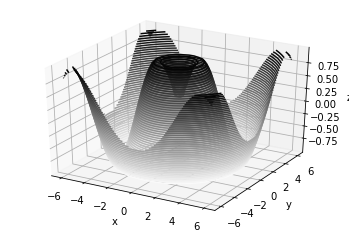

In [6]:
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.contour3D(X, Y, Z, 50, cmap='binary')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z');

Sometimes the default viewing angle is not great, in which case we can use the `view_init` method to set the elevation and azimuthal angles. In the following example, we'll use an elevation of 60 degrees (that is, 60 degrees above the x-y plane) and an azimuth of 35 degrees (that is, rotated 35 degrees counter-clockwise about the z-axis):

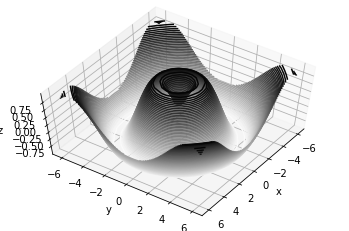

In [7]:
ax.view_init(60, 35)
fig

## Wireframes and Surface Plots

Two other types of three-dimensional plots that work on gridded data are wireframes and surface plots. These take a grid of values and project it onto the specified three-dimensional surface. Here is an example of using a wireframe:

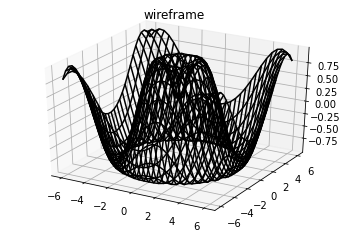

In [8]:
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.plot_wireframe(X, Y, Z, color='black')
ax.set_title('wireframe');

A surface plot is similar to a wireframe plot, but each face of the wireframe is a filled polygon.

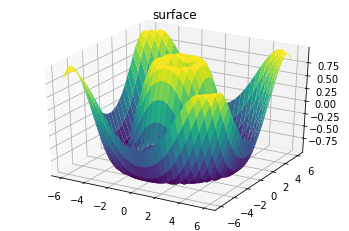

In [9]:
ax = plt.axes(projection='3d')
ax.plot_surface(X, Y, Z, rstride=1, cstride=1,
                cmap='viridis', edgecolor='none')
ax.set_title('surface');

Note that though the grid of values for a surface plot needs to be two-dimensional, it need not be rectilinear. Here is an example of creating a partial polar grid, which when used with the `surface3D` plot can give us a slice into the function we're visualizing:

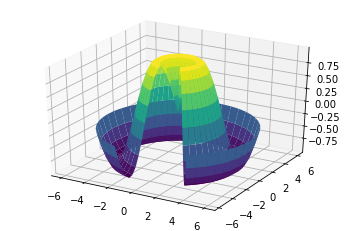

In [10]:
r = np.linspace(0, 6, 20)
theta = np.linspace(-0.9 * np.pi, 0.8 * np.pi, 40)
r, theta = np.meshgrid(r, theta)

X = r * np.sin(theta)
Y = r * np.cos(theta)
Z = f(X, Y)

ax = plt.axes(projection='3d')
ax.plot_surface(X, Y, Z, rstride=1, cstride=1,
                cmap='viridis', edgecolor='none');

## Surface Triangulations

For some applications, the evenly sampled grids required by the above routines is overly restrictive and inconvenient. In these situation, the triangulation-based plots can be very useful. What if rather than an even draw from a Cartesian or a polar grid, we instead have a set of random draws?

In [11]:
theta = 2 * np.pi * np.random.random(1000)
r = 6 * np.random.random(1000)
x = np.ravel(r * np.sin(theta))
y = np.ravel(r * np.cos(theta))
z = f(x, y)

We could create a scatter plot of the points to get an idea of the surface we're sampling from:

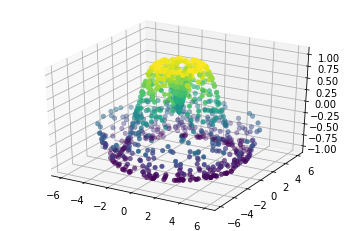

In [12]:
ax = plt.axes(projection='3d')
ax.scatter(x, y, z, c=z, cmap='viridis', linewidth=0.5);

We could get better results for this use case by using `ax.plot_trisurf`, which creates a surface by first finding a set of triangles formed between adjacent points:

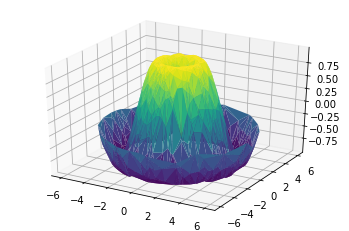

In [13]:
ax = plt.axes(projection='3d')
ax.plot_trisurf(x, y, z,
                cmap='viridis', edgecolor='none');

The result is not as clean as when it is plotted with a grid, but the flexibility of such triangulation allows for some really interesting three-dimensional plots.

### Example: Visualizing a Möbius strip

The key to creating the Möbius strip is to think about it's parametrization: it's a two-dimensional strip, so we need two intrinsic dimensions. Let's call them $\theta$, which ranges from $0$ to $2\pi$ around the loop, and $w$ which ranges from $-1$ to $1$ across the width of the strip:

In [14]:
theta = np.linspace(0, 2 * np.pi, 30)
w = np.linspace(-0.25, 0.25, 8)
w, theta = np.meshgrid(w, theta)

Now from this parametrization, we must determine the $(x, y, z)$ positions of the embedded strip.

There are two rotations happening: one is the position of the loop about its center (what we've called $\theta$), while the other is the twisting of the strip about its axis (we'll call this $\phi$). For a Möbius strip, we must have the strip make half a twist during a fool loop, or $\Delta\phi = \frac{\Delta\theta}{2}$

In [15]:
phi = 0.5 * theta

We'll define $r$, the distance of each point from the center, and use this to find the embedded coordinates:

In [16]:
# radius in x-y plane
r = 1 + w * np.cos(phi)

x = np.ravel(r * np.cos(theta))
y = np.ravel(r * np.sin(theta))
z = np.ravel(w * np.sin(phi))

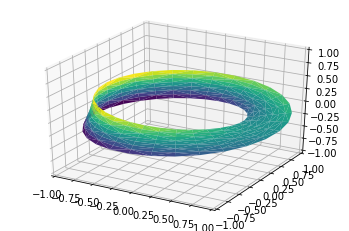

In [17]:
# triangulate in the underlying parametrization
from matplotlib.tri import Triangulation

tri = Triangulation(np.ravel(w), np.ravel(theta))

ax = plt.axes(projection='3d')
ax.plot_trisurf(x, y, z, triangles=tri.triangles,
                cmap='viridis', linewidths=0.2);

ax.set_xlim(-1, 1); ax.set_ylim(-1, 1); ax.set_zlim(-1, 1);